#### Non-linear transformation

Two types of transformations are available: 
1. quantile transforms 
2.  power transforms. 
      1. Yeo-Johnson
      2. Box-Cox
   
Both quantile and power transforms are based on monotonic transformations of the features and thus preserve the rank of the values along each feature.




Nonlinear data transformations are incredibly important in machine learning for several key reasons, primarily because **real-world data often isn't perfectly linear or normally distributed**, and many powerful machine learning algorithms perform best under specific data conditions.

Here's a breakdown of why nonlinear data transformation is crucial:

1.  **Addressing Skewness and Achieving Normality:**
    * **Problem:** Many real-world features (e.g., income, house prices, number of transactions) are heavily *skewed* (e.g., right-skewed with a long tail of high values). This means most data points are clustered at one end, and there are a few very large values.
    * **Why it's an issue:** Many statistical models (like linear regression) and machine learning algorithms (that assume underlying Gaussian distributions for their assumptions or efficiency) perform poorly with highly skewed data. Skewness can violate assumptions of linearity, homoscedasticity (constant variance), and normality of residuals.
    * **Solution:** Nonlinear transformations (like log transformation, square root, or Box-Cox/Yeo-Johnson) can make skewed distributions more symmetrical and closer to a normal (Gaussian) distribution. This helps to satisfy the assumptions of these models, leading to more reliable inferences and predictions.

2.  **Linearizing Relationships for Linear Models:**
    * **Problem:** Sometimes, the relationship between a feature and the target variable is inherently non-linear (e.g., exponential growth, decay, or a curved pattern). If you try to fit a linear model (like linear regression) to such data, it will perform poorly because it assumes a straight-line relationship.
    * **Solution:** Nonlinear transformations can transform a non-linear relationship into a more linear one. For example, if $Y$ and $X$ have an exponential relationship ($Y = e^X$), transforming $X$ to $log(X)$ can make the relationship with $Y$ linear. This allows you to use simpler, more interpretable linear models effectively, even when the underlying relationship is complex.
    * **Benefit:** Enables linear models to capture non-linear patterns, expanding their applicability without needing to switch to inherently non-linear models which can sometimes be less interpretable or more computationally expensive.

3.  **Stabilizing Variance (Homoscedasticity):**
    * **Problem:** In some datasets, the variance of a feature might increase with its mean (heteroscedasticity). This is common in time series data or financial data. Many linear models assume homoscedasticity (constant variance of errors).
    * **Solution:** Nonlinear transformations can help to stabilize the variance across the range of a feature, making the data more suitable for models that assume constant variance.

4.  **Handling Outliers and Reducing Their Impact:**
    * **Problem:** Outliers (extreme values) can significantly distort the mean and standard deviation of a feature, which in turn can heavily influence the parameters of a machine learning model.
    * **Solution:** Transformations like the log transform compress larger values, effectively pulling outliers closer to the rest of the data and reducing their undue influence. While Robust Scaling is specifically for outliers in terms of scale, nonlinear transformations address outliers by changing the distribution shape itself.

5.  **Improving Model Performance and Accuracy:**
    * By addressing skewness, normalizing distributions, and linearizing relationships, nonlinear transformations can directly lead to more accurate and robust machine learning models. When data better fits the assumptions of an algorithm, the algorithm can learn more effectively from the patterns in the data.

6.  **Feature Engineering:**
    * Nonlinear transformations can be a form of feature engineering, creating new features that capture complex relationships not apparent in the raw data. For example, creating polynomial features ($X^2, X^3$) explicitly introduces non-linearity that linear models can then learn.

In summary, nonlinear data transformations are essential for:
* Making data conform to statistical assumptions of various models.
* Enabling linear models to capture complex, non-linear patterns.
* Improving model stability, convergence speed, and predictive accuracy.
* Effectively handling skewed data and reducing the impact of outliers.

It's a powerful tool in a data scientist's arsenal to preprocess data into a format that allows machine learning algorithms to perform optimally.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# generate non linear data (Exponential Distubition)

np.random.seed(0)  # For reproducibility
df = np.random.exponential(size=1000,scale=2)
df= pd.DataFrame(df, columns=['Value'])

In [3]:
df.head()

,Value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [4]:
df.shape

(1000, 1)

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Histogram of Exponential Distribution')

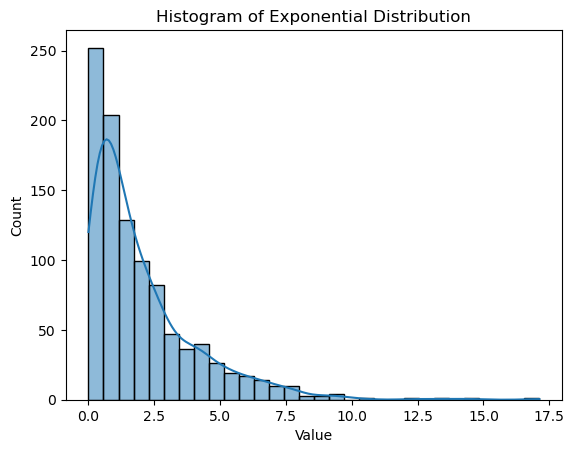

In [5]:
sns.histplot(df['Value'], bins=30, kde=True)
plt.title('Histogram of Exponential Distribution')

In [6]:
# non linear data transformation(Box-Cox Transformation)
from sklearn.preprocessing import PowerTransformer
power_transform = PowerTransformer(method='box-cox', standardize=True)
df_transformed = power_transform.fit_transform(df[['Value']])
df_transformed

array([[ 1.58968863e-01],
       [ 6.02906481e-01],
       [ 2.98068107e-01],
       [ 1.48896645e-01],
       [-1.64775758e-01],
       [ 4.11617458e-01],
       [-1.27995447e-01],
       [ 1.23254945e+00],
       [ 1.72738634e+00],
       [-2.72996509e-01],
       [ 8.37867056e-01],
       [ 1.07946918e-01],
       [ 2.08330429e-01],
       [ 1.41987402e+00],
       [-1.50605742e+00],
       [-1.39304633e+00],
       [-2.07677177e+00],
       [ 9.81612506e-01],
       [ 7.93551040e-01],
       [ 1.13211060e+00],
       [ 1.92381079e+00],
       [ 8.62776705e-01],
       [-6.55669893e-02],
       [ 8.01198957e-01],
       [-1.21021688e+00],
       [ 3.95704612e-01],
       [-1.08555271e+00],
       [ 1.55391101e+00],
       [ 8.98995293e-02],
       [-1.88691197e-01],
       [-6.23412841e-01],
       [ 7.80992823e-01],
       [-7.94298332e-02],
       [ 2.09331715e-01],
       [-2.10459419e+00],
       [ 3.36897817e-01],
       [ 3.22399834e-01],
       [ 3.35059548e-01],
       [ 1.5

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


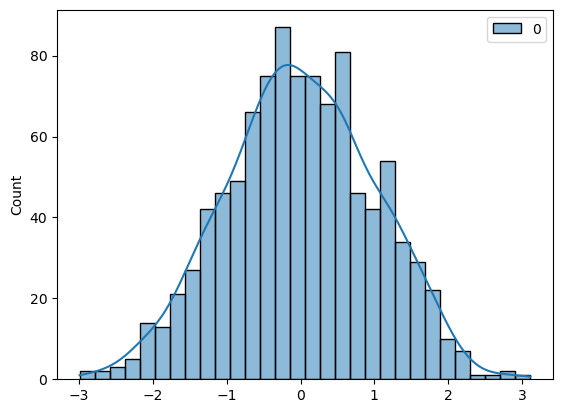

In [7]:
sns.histplot(df_transformed, bins=30, kde=True)
plt.show()

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Yeo-Johnson Transformation of Exponential Distribution')

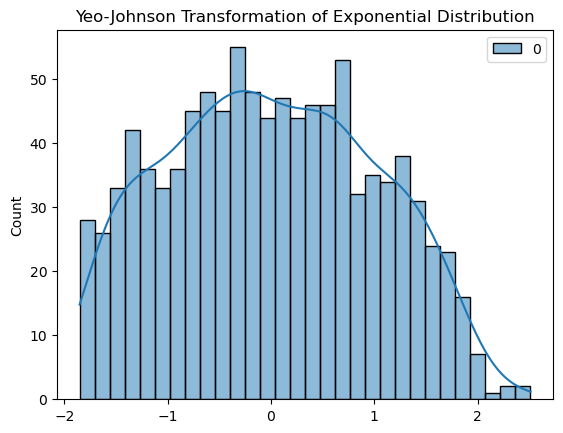

In [10]:
# non linear data transformation(Yeo-Johnson Transformation)
from sklearn.preprocessing import PowerTransformer
pt_yj=PowerTransformer(method='yeo-johnson', standardize=True)
df_transformed_yj = pt_yj.fit_transform(df[['Value']])
sns.histplot(df_transformed_yj, bins=30, kde=True)
plt.title('Yeo-Johnson Transformation of Exponential Distribution')

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


Text(0.5, 1.0, 'Quantile Transformation of Exponential Distribution')

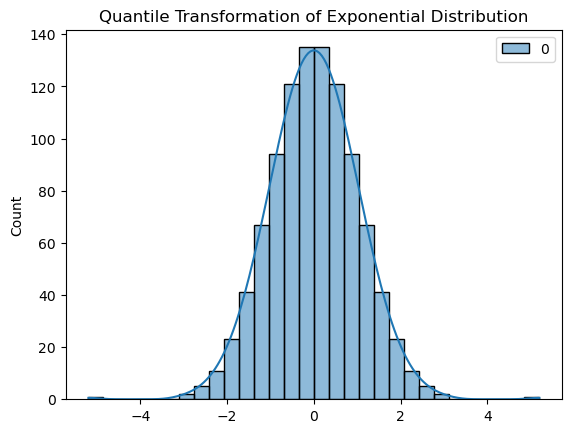

In [11]:
# non linear data transformation(quintile transformation)
from sklearn.preprocessing import QuantileTransformer 
qt = QuantileTransformer(output_distribution='normal')
df_transformed_qt = qt.fit_transform(df[['Value']])
sns.histplot(df_transformed_qt, bins=30, kde=True)
plt.title('Quantile Transformation of Exponential Distribution')  

In [12]:
df.head()

,Value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


All non linear data transformation technique in one cell

In [15]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
pt_boxcox=PowerTransformer(method='box-cox',standardize=True)
pt_yeojohnson=PowerTransformer(method='yeo-johnson',standardize=True)
qt=QuantileTransformer(output_distribution='normal')
# Fit and transform the data using Box-Cox
df['Box-cox']=pt_boxcox.fit_transform(df[['Value']])
# Fit and transform the data using Yeo-Johnson
df['Yeo-Johnson']=pt_yeojohnson.fit_transform(df[['Value']])
# Fit and transform the data using Quantile Transformation
df['Quantile Transformation']=qt.fit_transform(df[['Value']])

In [16]:
df.head()

,Value,Box-cox,Yeo-Johnson,Quantile Transformation
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


##### Plot all transformation

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


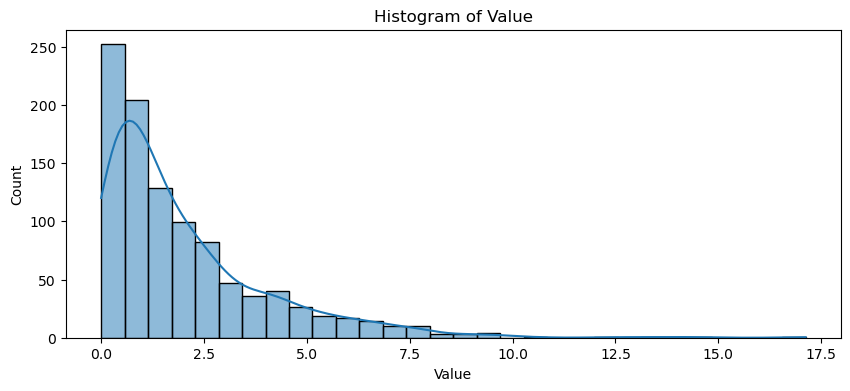

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


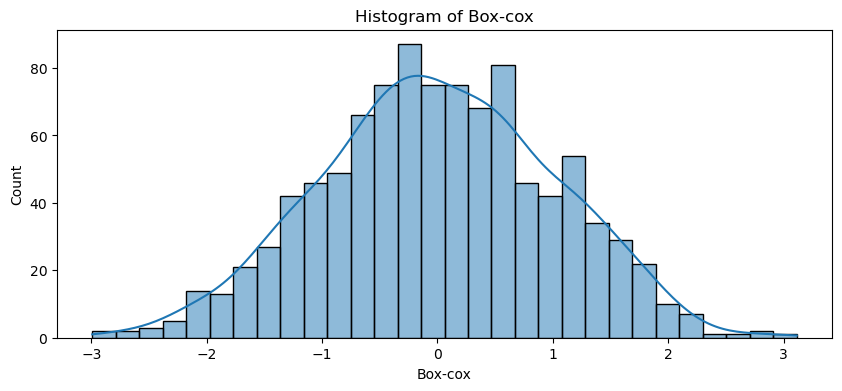

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


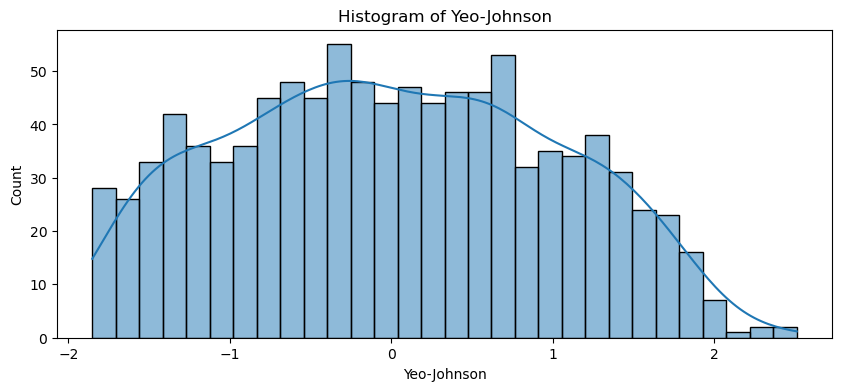

c:\Users\SIZAN\miniconda3\envs\data_science_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


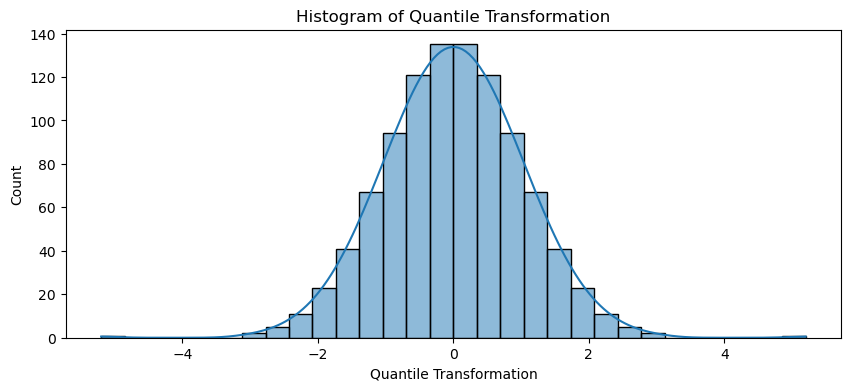

In [17]:
for col in df.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()

[Source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)
[source2](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html)

[sacling_notebook(github)](https://github.com/OmarRashedSizan/Machine_learning/blob/main/scaling.ipynb)